# **Tipos de gráficos estadísticos descriptivos.**

Ayer veíamos:
- Realizar histogramas (encontrar frecuencias)
- Formas de distribución de probabilidad (gráficas con picos)
- Encontrar medidas de tendencia central
( .describe() : Util para realizar análisis estadístico general)
- Encontrar medidas de dispersión (varianza, desviacion estándar)

* Criterio para determinar un "punto de referencia"

- Hacer unos diagramas o gráficos: Diagrama de caja y/o un diagrama de violín.

Los gráficos estadísticos descriptivos básicos son herramientas fundamentales en el análisis de datos, ya que permiten visualizar y entender mejor la distribución, tendencia central, dispersión, entre otras características de los datos. Los más comunes son:

Histograma: Muestra la distribución de frecuencias de un conjunto de datos.

Diagrama de caja y bigotes (Boxplot): Proporciona una representación visual de la distribución de los datos, incluyendo mediana, cuartiles, y valores atípicos.

Gráfico de barras: Utilizado para comparar cantidades de diferentes categorías.

Gráfico de líneas: Muestra la evolución de los datos a lo largo del tiempo o en relación con otra variable continua.

Diagrama de dispersión (Scatter plot): Muestra la relación entre dos variables cuantitativas.

**Ejemplo:**

Primero, utilizamos un conjunto de datos para utilizar en los ejemplos de código:

Tenemos conjunto de datos que incluye las variables 'Edad', 'Ingresos' y 'Puntuación de satisfacción' para 100 individuos.

Cargando y revisando el dataset

Primero, cargamos el dataset desde el archivo CSV para entender su estructura y verificar que se ha cargado correctamente.

In [1]:
#Importación de librerías:
import pandas as pd

# Cargar el dataset desde el archivo CSV
ruta = '/content/dataset_ejemplo.csv'

df = pd.read_csv(ruta)

# Mostrar las primeras filas del DataFrame para revisión
df.head()


,Edad,Ingresos,Puntuacion_de_satisfaccion
0,56,47476.923679,7
1,46,67471.529683,9
2,32,46313.784689,9
3,25,38454.983395,3
4,38,68182.585132,3


In [2]:
#Segundo comando "mágico"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        100 non-null    int64  
 1   Ingresos                    100 non-null    float64
 2   Puntuacion_de_satisfaccion  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


## 1. Histograma

Funciona para visualizar el conteo de una variable que no tiene muchos valores de entrada.

Un histograma es útil para visualizar la distribución de una variable numérica. Muestra la frecuencia de los datos que caen en distintos rangos o "bins". Es excelente para entender la forma de la distribución de los datos, como identificar si es una distribución normal, sesgada, bimodal, etc.

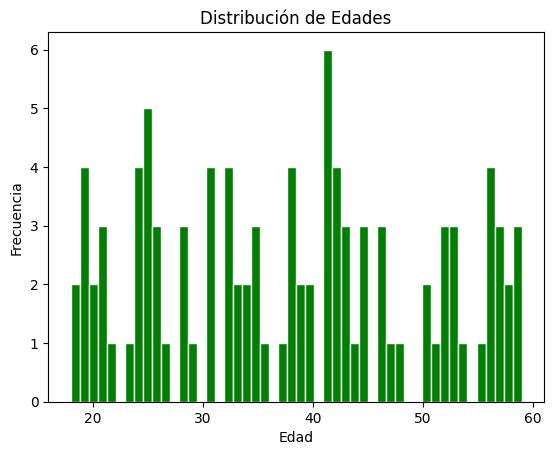

In [15]:
# Histograma para la variable 'Edad'


#Importar librerías: Matplotlib
import matplotlib.pyplot as plt

#Características del gráfico
plt.hist(df['Edad'], bins=50
        , color='green', edgecolor='white')

#Encabezado:
plt.title('Distribución de Edades')

#Para los ejes:
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

#Mostrar gráfico:
plt.show()


Este histograma muestra la distribución de las edades en el conjunto de datos. Cada barra representa un rango de edades (bin), y la altura de la barra indica la cantidad de observaciones dentro de ese rango. A través de este gráfico, podemos tener una idea clara de cómo se distribuyen las edades de los individuos en el dataset, por ejemplo, si hay una concentración mayor en ciertas edades.

## 2. Diagrama de caja y bigotes (Boxplot)

El diagrama de caja y bigotes ofrece una representación visual de la distribución de los datos que incluye la mediana, los cuartiles, y los valores atípicos. Es útil para identificar la dispersión de los datos, la simetría de la distribución y los posibles valores atípicos.

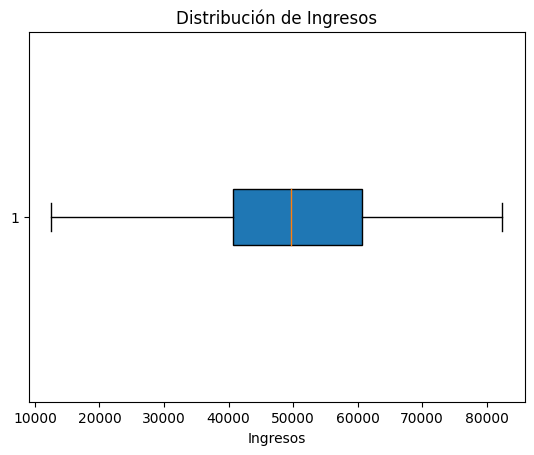

In [11]:
# Diagrama de caja y bigotes para la variable 'Ingresos'

plt.boxplot(df['Ingresos'], vert=False, patch_artist=True)

#Encabezado:
plt.title('Distribución de Ingresos')

#Eje:
plt.xlabel('Ingresos')

#Mostrar:
plt.show()

El diagrama de caja y bigotes para 'Ingresos' muestra el rango intercuartílico (la caja), con la mediana marcada dentro de la caja. Los "bigotes" se extienden desde el primer cuartil hasta el valor mínimo y desde el tercer cuartil hasta el valor máximo dentro de un rango intercuartílico 1.5 veces mayor (valores fuera de este rango se consideran atípicos y se marcan como puntos). Este gráfico es valioso para entender la dispersión de los ingresos, identificar la mediana, y observar si hay valores atípicos significativos.

In [12]:
#Análisis estadístico
df.describe()

,Edad,Ingresos,Puntuacion_de_satisfaccion
count,100.000000,100.000000,100.000000
mean,37.910000,50125.408702,4.780000
std,12.219454,14684.490603,2.680193
min,18.000000,12518.612875,1.000000
25%,26.750000,40689.408589,3.000000
50%,38.000000,49719.768392,4.500000
75%,46.250000,60624.020802,7.000000
max,59.000000,82380.927850,9.000000


## 3. Gráfico de barras

Un gráfico de barras es útil para comparar cantidades de diferentes categorías. Podemos usarlo, por ejemplo, para comparar la media de 'Puntuación de satisfacción' entre diferentes rangos de edad. Primero, necesitamos agrupar los datos por rangos de edad.

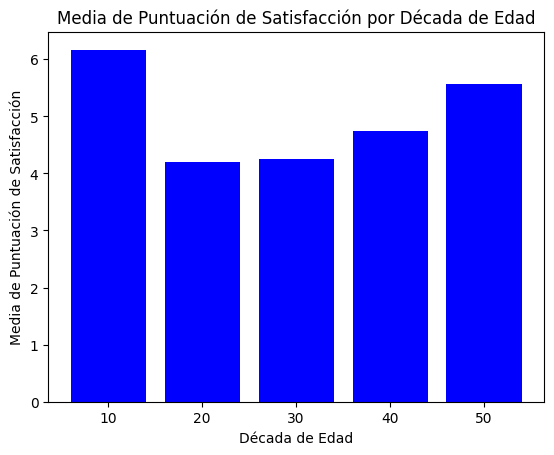

In [13]:
# Agrupar por década de edad y calcular la media de 'Puntuacion_de_satisfaccion'

df['Decada_de_edad'] = df['Edad'] // 10 * 10

#Crear media satisfaccion por decada
media_satisfaccion_por_decada = df.groupby('Decada_de_edad')['Puntuacion_de_satisfaccion'].mean().reset_index()

# Gráfico de barras
plt.bar(media_satisfaccion_por_decada['Decada_de_edad'].astype(str), media_satisfaccion_por_decada['Puntuacion_de_satisfaccion'], color='blue')

#Definimos el ENCABEZADO
plt.title('Media de Puntuación de Satisfacción por Década de Edad')

#Definimos los ejes
plt.xlabel('Década de Edad')
plt.ylabel('Media de Puntuación de Satisfacción')

#Mostramos
plt.show()


El gráfico de barras muestra la media de la 'Puntuación de satisfacción' para cada década de edad. Cada barra representa una década diferente, y la altura de la barra indica la media de la puntuación de satisfacción para esa década. Este tipo de gráfico es excelente para comparar las medias entre grupos y visualizar diferencias.

## 4. Gráfico de líneas

Un gráfico de líneas es ideal para visualizar la evolución de una cantidad a lo largo del tiempo o en relación con otra variable continua. Dado que nuestro conjunto de datos no incluye una variable temporal, simularé datos temporales para ilustrar cómo crear este gráfico.

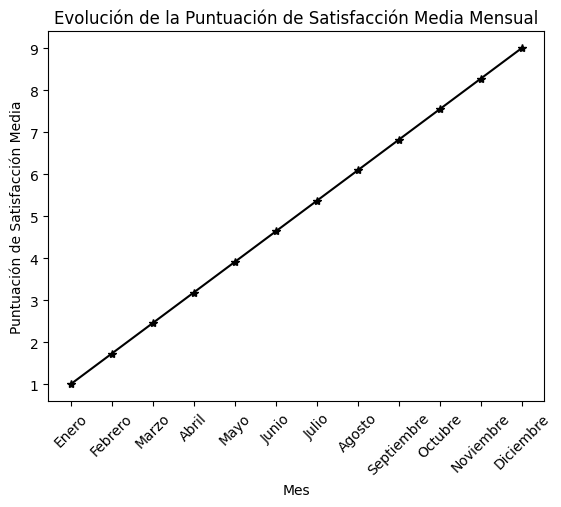

In [21]:
#Importar librería:

import numpy as np

# Simular datos temporales para 'Puntuacion_de_satisfaccion' media por mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

puntuacion_media_mensual = np.linspace(start=df['Puntuacion_de_satisfaccion'].min(), stop=df['Puntuacion_de_satisfaccion'].max(), num=len(meses))

# Gráfico de líneas
plt.plot(meses, puntuacion_media_mensual, marker='*', linestyle='-', color='black')

#Definir encabezado
plt.title('Evolución de la Puntuación de Satisfacción Media Mensual')

#Definir ejes
plt.xlabel('Mes')
plt.ylabel('Puntuación de Satisfacción Media')

#Rotacion
plt.xticks(rotation=45)

#Mostrar
plt.show()


El gráfico de líneas muestra una simulación de la evolución de la 'Puntuación de satisfacción' media a lo largo de varios meses. Los puntos en el gráfico representan la puntuación media en cada mes, y la línea conecta estos puntos para mostrar la tendencia. Este gráfico es útil para visualizar cambios y tendencias a lo largo del tiempo o en relación con otra variable continua.

## 5. Diagrama de dispersión (Scatter plot)

Un diagrama de dispersión es útil para explorar relaciones entre dos variables numéricas, mostrando cómo una variable se relaciona con otra. Vamos a crear un diagrama de dispersión para examinar la relación entre 'Edad' e 'Ingresos'.

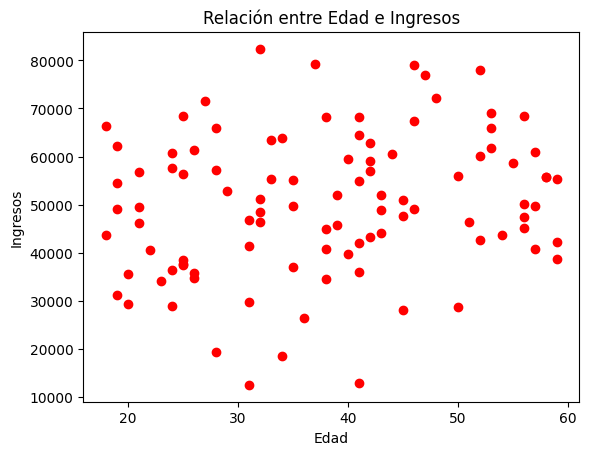

In [22]:
# Diagrama de dispersión entre 'Edad' e 'Ingresos'

plt.scatter(df['Edad'], df['Ingresos'], color='red')

#Definimos las caracteristicas del grafico
plt.title('Relación entre Edad e Ingresos')
plt.xlabel('Edad')
plt.ylabel('Ingresos')

#Mostrar grafico
plt.show()

El diagrama de dispersión muestra la relación entre 'Edad' e 'Ingresos'. Cada punto en el gráfico representa un individuo, con su edad en el eje x e ingresos en el eje y. Este gráfico es valioso para identificar patrones, tendencias o correlaciones entre dos variables. Por ejemplo, podríamos buscar si hay una tendencia creciente que indique que los ingresos aumentan con la edad, o si no hay una relación clara entre estas variables.

## 6. Gráfico de torta (pie-chart)

Son útiles cuando queremos mostrar cómo se distribuye una variable categórica en términos de proporciones o porcentajes del total. Dado que nuestro conjunto de datos consiste principalmente en variables numéricas, podemos crear una categoría basada en una de estas variables dividiéndola en rangos.

Por ejemplo, podríamos categorizar la 'Edad' en diferentes grupos y luego mostrar la distribución de estas categorías.

Vamos a dividir la 'Edad' en categorías y generar un gráfico de torta para visualizar la distribución de estas categorías dentro del conjunto de datos.

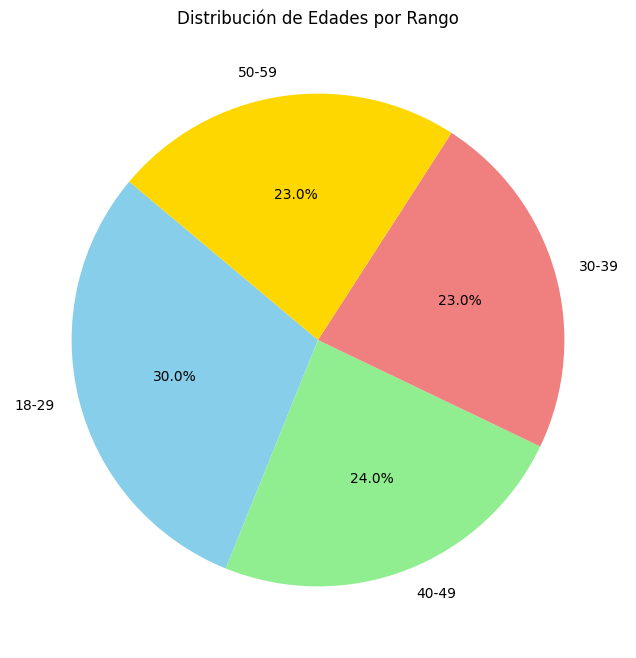

In [24]:
# Categorizar la 'Edad' en grupos
bins = [18, 30, 40, 50, 60]
labels = ['18-29', '30-39', '40-49', '50-59']
df['Rango_de_edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Contar frecuencias de cada rango de edad
edad_counts = df['Rango_de_edad'].value_counts()

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(edad_counts, labels=edad_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Distribución de Edades por Rango')

#Mostrar
plt.show()

El gráfico de torta muestra la distribución de las edades por rango dentro del conjunto de datos.
Cada sección del gráfico representa un rango de edad diferente, y el tamaño de cada sección es proporcional al número de individuos que caen en ese rango. Los porcentajes indican la proporción de cada grupo de edad respecto al total.

Este tipo de gráfico es útil para comprender rápidamente la composición de los datos en términos de categorías o grupos, permitiendo identificar qué proporciones del total corresponden a cada categoría.